# What is k-Nearest Neighbors (non-parametric or non-linear)

## How does k-Nearest Neighbors Work (instance-based, competitive learning and lazy learning algorithms)

The kNN algorithm is belongs to the family of instance-based, competitive learning and lazy learning algorithms.

Instance-based algorithms are those algorithms that model the problem using data instances (or rows) in order to make predictive decisions. The kNN algorithm is an extreme form of instance-based methods because all training observations are retained as part of the model.

It is a competitive learning algorithm, because it internally uses competition between model elements (data instances) in order to make a predictive decision. The objective similarity measure between data instances causes each data instance to compete to “win” or be most similar to a given unseen data instance and contribute to a prediction.

Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

Finally, kNN is powerful because it does not assume anything about the data, other than a distance measure can be calculated consistently between any two instances. As such, it is called non-parametric or non-linear as it does not assume a functional form.

## Knn classifier implementation in scikit learn

We are going to examine the Breast Cancer Dataset using python sklearn library to model K-nearest neighbor algorithm. After modeling the knn classifier, we are going to use the trained knn model to predict whether the patient is suffering from the benign tumor or malignant tumor. The greatness of using  Sklearn is that it provides us the functionality to implement machine learning algorithms in a few lines of code.


As we discussed the principle behind KNN classifier (K-Nearest Neighbor) algorithm is to find K predefined number of training samples closest in the distance to new point & predict the label from these. The distance measure is commonly considered to be Euclidean distance.

## Euclidean distance

Euclidean distance is the most commonly used distance measure. Euclidean distance also called as simply distance. The usage of Euclidean distance measure is highly recommended when data is dense or continuous. Euclidean distance is the best proximity measure. The Euclidean distance between two points is the length of the path connecting them.The Pythagorean theorem gives this distance between two points.

### Euclidean distance implementation in python

In [1]:
from math import *
 
def euclidean_distance(x,y):
 
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
 
euclidean_distance([0,3,4,5],[7,6,3,-1])

9.746794344808963

In [2]:
x=[0,3,4,5]
y=[7,6,3,-1,2]
for a, b in zip(x, y):
    print(a,b)

0 7
3 6
4 3
5 -1


## Wisconsin Breast Cancer Data Set

The Wisconsin Breast Cancer Database was collected by Dr. William H. Wolberg (physician), University of Wisconsin Hospitals, USA. This dataset consists of 10 continuous attributes and 1 target class attributes. Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. Benign tumors do not spread to other parts while the malignant tumor is cancerous. The dataset was collected & openly distributed so as to find out some patterns from this data.

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. Benign tumors do not spread to other parts while the malignant tumor is cancerous. The dataset was collected & openly distributed so as to find out some patterns from this data.

## Breast Cancer Data Set Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 – 10
3. Uniformity of Cell Size: 1 – 10
4. Uniformity of Cell Shape: 1 – 10
5. Marginal Adhesion: 1 – 10
6. Single Epithelial Cell Size: 1 – 10
7. Bare Nuclei: 1 – 10
8. Bland Chromatin: 1 – 10
9. Normal Nucleoli: 1 – 10
10. Mitoses: 1 – 10
11. Class: (2 for benign, 4 for malignant)

#### Problem Statement:

To model the knn classifier using the Breast Cancer data for predicting whether a patient is suffering from the benign tumor or malignant tumor.

#### KNN Model for Cancerous tumor detection:

To diagnose Breast Cancer, the doctor uses his experience by analyzing details provided by

   * Patient’s Past Medical History
   * Reports of all the tests performed.


Using the modeled KNN classifier, we will solve the problem in a way similar to the procedure used by doctors. The modeled KNN classifier will compare the new patient’s test reports, observation metrics with the records of patients(training data) that correctly classified as benign or malignant.


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Data Import:

We are using breast cancer data. You can download it from archive.ics.uci.edu website. For importing the data and manipulating it, we are going to use numpy arrays.
Using genfromtxt() method, we are importing our dataset into the 2d numpy array. You can import text files using this function. We are passing 3 parameters:

fname
It handles the filename with extension.


delimiter
 The string used to separate values. In our dataset “,”(comma) is the separator.


dtype
It handles data type of variables.


All the values are numeric in our database. But some values are missing and are replaced by “?”. So, we will have to perform data imputation. Due to this reason, we are using float dtype.

In [4]:
cancer_data = np.genfromtxt(fname ='cancer-wisconsin.data', delimiter= ',', dtype= float)

In [5]:
print("Dataset Length:: ", len(cancer_data))
print("Dataset:: ", str(cancer_data))
print("Dataset Shape:: ", cancer_data.shape)

Dataset Length::  699
Dataset::  [[1.000025e+06 5.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 ... 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 ... 1.000000e+00 1.000000e+00
  2.000000e+00]
 ...
 [8.888200e+05 5.000000e+00 1.000000e+01 ... 1.000000e+01 2.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 6.000000e+00 1.000000e+00
  4.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 4.000000e+00 1.000000e+00
  4.000000e+00]]
Dataset Shape::  (699, 11)


## The cancer dataset’s first column consists of patient’s id. To make this prediction process unbiased, we should remove this patient id. We can use numpy delete() method for this operation.

delete(): It returns a new transformed array. Three parameters should be passed.

   * arr: It holds the array name.
   * obj: It indicates which sub-arrays to remove.
   * axis: The axis along which to delete. axis = 1 is used for columns & axis = 0 for rows.

In [6]:
cancer_data = np.delete(arr = cancer_data, obj= 0, axis = 1)

Now, we wish to divide the dataset into feature & label dataset. i.e., feature data is predictor variables they will help us to predict labels(criterion variable). Here, first 9 columns include continuous variables that will help us to predict whether a patient is having the benign tumor or malignant tumor.

In [7]:
X = cancer_data[:,range(0,9)]
Y = cancer_data[:,9]

In [8]:
Y.shape

(699,)

In [9]:
import pandas as pd
df=pd.DataFrame(X)
df[9]=Y
df.head()

,0,1,2,3,4,5,6,7,8,9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


# Data Imputation:

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value.
Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column to substitute with the missing value.

In [10]:
#X
# np.isnan(X)
np.count_nonzero(np.isnan(X))

16

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [13]:
X = imp.fit_transform(X)

In [14]:
len(Y)-1

698

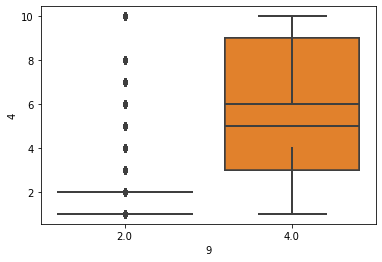

In [15]:
#draw 10 box plots for different values
import seaborn as sns
for i in range(len(Y)-1):
     sns.boxplot(x=9,y=Y[i],data=df)

## Train, Test data split:

For dividing data into train data & test data. We are using train_test_split() method by sklearn.
train_test_split(): We are using 4 parameters X, Y, test_size, random_state

   * X, Y:  X is a numpy array consisting of feature dataset & Y contains labels for each record.
   
   * test_size: It represents the size of test data needs to split. If we use 0.4, it indicates 40% of data should be separated and saved as testing data.
   
   * random_state: It’s pseudo-random number generator state used for random sampling. If you want to replicate our results, then use the same value of random_state.
   
Now, X_train & y_train are training datasets. X_test & y_test are testing datasets.
y_train & y_test are 2d numpy arrays with 1 column. To convert it into a 1d array, we are using ravel().

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

## KNN Implementation:

Now we are fitting KNN algorithm on training data, predicting labels for dataset and printing the accuracy of the model for different values of K(ranging from 1 to 25).

**KNeighborsClassifier():** This is the classifier function for KNN. It is the main function for implementing the algorithms. Some important parameters are:

   * n_neighbors: It holds the value of K, we need to pass and it must be an integer. If we don’t give the value of n_neighbors then by default, it takes the value as 5.
   * Weights: It holds a string value i.e., name of the weight function. The Weight function used in prediction. It can hold values like ‘uniform’ or ‘distance’ or any user defined function.
      * ‘uniform’ weight used when all points in the neighborhood are weighted equally. Default value for weights taken as ‘uniform’
      * ‘distance’ weight used for giving closer neighbors- higher weight and far neighbors-less weight, i.e., weight points by the inverse of their distance.
      * user defined function we can call the user defined functions. The user defined function can used when we want to produce custom weight values. It accepts distance values and returns an array of weights.
   * algorithm: It specifies algorithm which should be used to compute the nearest neighbors. It can values like ‘auto’, ‘ball_tree’, ‘kd_tree’, brute’. It is an optional parameter.
      * a) ‘ball_tree’ , ‘kd_tree’ are used to implement ball tree algorithm. These are special kind of data structures for space partitioning.
      * b) ‘brute’ is used to implement brute-force search algorithm.
      * c) ‘auto’ is used to give control to the system. By using ‘auto’, it automatically decides the best algorithm according to values of training data.fit()
   * data.fit(): A fit method is used to fit the model. It is passed with two parameters:X and Y. For training data fitting on KNN algorithm, this needs to call.
      * X: It consists of training data with features.
      * Y: It consists of training data with labels.predict(): It predicts class labels for the data provided as its parameters.
If an array of features data is entered as parameters, then an array of labels is given as output.

#### Accuracy Score:

accuracy_score(): This function is used to print accuracy of KNN algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.

   * y_true,
   * y_pred,
   * normalize,
   * sample_weight.
Out of these 4, normalize & sample_weight are optional parameters. The parameter y_true  accepts an array of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value.

In [17]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  95.23809523809523 % for K-Value: 1
Accuracy is  93.33333333333333 % for K-Value: 2
Accuracy is  95.71428571428572 % for K-Value: 3
Accuracy is  95.23809523809523 % for K-Value: 4
Accuracy is  95.71428571428572 % for K-Value: 5
Accuracy is  94.76190476190476 % for K-Value: 6
Accuracy is  94.76190476190476 % for K-Value: 7
Accuracy is  94.28571428571428 % for K-Value: 8
Accuracy is  94.76190476190476 % for K-Value: 9
Accuracy is  94.28571428571428 % for K-Value: 10
Accuracy is  94.28571428571428 % for K-Value: 11
Accuracy is  94.76190476190476 % for K-Value: 12
Accuracy is  94.76190476190476 % for K-Value: 13
Accuracy is  93.80952380952381 % for K-Value: 14
Accuracy is  93.80952380952381 % for K-Value: 15
Accuracy is  93.80952380952381 % for K-Value: 16
Accuracy is  93.80952380952381 % for K-Value: 17
Accuracy is  93.80952380952381 % for K-Value: 18
Accuracy is  93.80952380952381 % for K-Value: 19
Accuracy is  93.80952380952381 % for K-Value: 20
Accuracy is  93.8095238095238

In [18]:
#y_pred = neigh.predict(X_test)
#X_train
y_test[0]

2.0

It shows that we are getting 95.71% accuracy on K = 3, 5. Choosing a large value of K will lead to greater amount of execution time & underfitting. Selecting the small value of K will lead to overfitting. There is no such guaranteed way to find the best value of K. So, to run it quickly we are considering K =3 for this tutorial.

### Nearest Neighbours: Pros and Cons

#### Pros:
   * Simple to implement
   * Flexible to feature / distance choices
   * Naturally handles multi-class cases
   * Can do well in practice with enough representative data


#### Cons:
   * Large search problem to find nearest neighbours
   * Storage of data
   * Must know we have a meaningful distance function


# Naive Bayes Classifiers

Here we will learn how to use Naive Bayes Classifier to perform a Multi Class Classification on a data set we are already familiar with: the Iris Data Set. This Section will consist of 7 main parts:

   * Note on Notation and Math Terms
   * Bayes' Theorem
   * Introduction to Naive Bayes
   * Naive Bayes Classifier Mathematics Overview
   * Constructing a classifier from the probability model
   * Gaussian Naive Bayes
   * Gaussian Naive Bayes with SciKit Learn
    
Let's go ahead and begin!

### Note on Notation and Math Terms

There are a few more advanced notations and amthematical terms used during the explanation of naive Bayes Classification.
You should be familiar with the following:

#### Product of Sequence

The product of a sequence of terms can be written with the product symbol, which derives from the capital letter Π (Pi) in the Greek alphabet. The meaning of this notation is given by:
 $$\prod_{i=1}^4 i = 1\cdot 2\cdot 3\cdot 4,  $$
that is
 $$\prod_{i=1}^4 i = 24. $$
 
#### Arg Max

In mathematics, the argument of the maximum (abbreviated arg max or argmax) is the set of points of the given argument for which the given function attains its maximum value. In contrast to global maximums, which refer to a function's largest outputs, the arg max refers to the inputs which create those maximum outputs.

The arg max is defined by

$$\operatorname*{arg\,max}_x  f(x) := \{x \mid \forall y : f(y) \le f(x)\}$$

In other words, it is the set of points x for which f(x) attains its largest value. This set may be empty, have one element, or have multiple elements. For example, if f(x) is 1−|x|, then it attains its maximum value of 1 at x = 0 and only there, so

$$\operatorname*{arg\,max}_x (1-|x|) = \{0\}$$



### Bayes' Theorem

First, for a quick introduction to Bayes' Theorem, check out the Bayes' Theorem Lecture in the statistics appendix portion of this course, in order ot fully understand Naive Bayes, you'll need a complete understanding of the Bayes' Theorem.

### Introduction to Naive Bayes

Naive Bayes is probably one of the practical machine learning algorithms. Despite its name, it is actually performs very well considering its classification performance. It proves to be quite robust to irrelevant features, which it  ignores. It learns and predicts very fast and it does not require lots of storage. So, why is it then called naive?

The naive was added to the account for one assumption that is required for Bayes to work optimally: all features must be independent of each other. In reality, this is usually not the case, however, it still returns very good accuracy in practice even when the independent assumption does not hold.

Naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. We will be working with the Iris Flower data set in this lecture.

### Naive Bayes Classifier Mathematics Overview

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Given a class variable y and a dependent feature vector x<sub>1</sub> through x<sub>n</sub>, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

for all i, this relationship is simplified to:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                               
We now have a relationship between the target and the features using Bayes Theorem along with a Naive Assumption that all features are independent.

### Constructing a classifier from the probability model

So far we have derived the independent feature model, the Naive Bayes probability model. The Naive Bayes classifier combines this model with a *decision rule*, this decision rule will decide which hypothesis is most probable, in our example case this will be which class of flower is most probable.

Picking the hypothesis that is most probable  is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label to y as follows:

Since P(x<sub>1</sub>, ..., x<sub>n</sub>) is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use Maximum A Posteriori (MAP) estimation to estimate P(y) and P(x<sub>i</sub> | y); the former is then the relative frequency of class y in the training set.

There are different naive Bayes classifiers that differ mainly by the assumptions they make regarding the distribution of P(x<sub>i</sub> | y).

### Gaussian Naive Bayes

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. Go back to the normal distribution lecture to review the formulas for the Gaussian/Normal Distribution.

For example of using the Gaussian Distribution, suppose the training data contain a continuous attribute, x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let  μ<sub>c</sub> be the mean of the values in x associated with class c, and let  σ<sup>2</sup><sub>c</sub> be the variance of the values in x associated with class c. Then, the probability distribution of some value given a class, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by μ<sub>c</sub> and  σ<sup>2</sup><sub>c</sub>. That is:

$$p(x=v|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$$


The key to Naive Bayes is making the (rather large) assumption that the presences (or absences) of
each data feature are independent of one another, conditional on a data having a certain label.

### Gaussian Naive Bayes with SciKit Learn
We'll start by importing the usual.

Quick note we will actually only use the SciKit Learn Library in this lecture:

In [19]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

Now that we have our module imports, let's go ahead and import the Iris Data Set. We have previously worked with this dataset, so go ahead and look at Lectures on MultiClass Classification for a complete breakdown on this data set!

In [20]:
# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Since we have already done a general analysis of this data in earlier lectures, let's go ahead and move on to using the Naive Bayes Method to seperate this data set into multiple classes.

First we create and fit the model

In [21]:
# Fit a Naive Bayes model to the data
model = GaussianNB()

Now that we have our model, we will continue by seperating into training and testing sets:

In [22]:
from sklearn.model_selection import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

Now we fit our model using the training data set:

In [23]:
# Fit the training model
model.fit(X_train,Y_train)

GaussianNB()

Now we predict the outcomes from the Testing Set:

In [24]:
# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = Y_test

Finally we can see the metrics for performance:

In [25]:
print(metrics.accuracy_score(expected, predicted))

0.9736842105263158


It looks like we have about 94.7% accuracy using the Naive Bayes method!